In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from pylab import rcParams
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles,make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
np.set_printoptions(suppress=True)
zeros_one_colourmap = ListedColormap(('green','orange'))
rcParams['figure.figsize'] = 14,7
#rcParams['axes.facecolor'] = '#383838'

In [12]:
X,y = make_circles(n_samples=1000,
                  factor=0.85,
                  random_state=2021,
                  noise=0.1)

In [13]:
X.shape

(1000, 2)

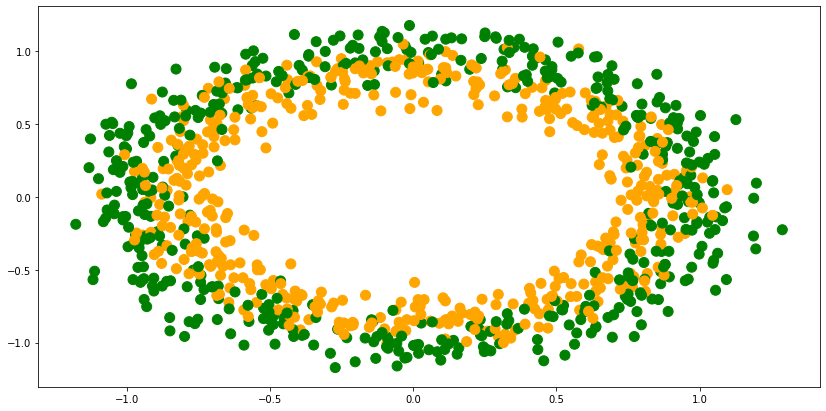

In [14]:
plt.scatter(X[:,0],X[:,1],
            c=y,s=100,
           cmap=zeros_one_colourmap)
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.33,
                                                random_state=42)

In [16]:
def get_model(inp_activaion):
    model = Sequential()
    model.add(Dense(10,input_dim=2,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(10,activation=inp_activaion))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

In [17]:
def change_in_weight_gradient(old_weight,new_weight,learning_rate):
    gradient = (old_weight-new_weight)/learning_rate
    pct_change_weight = abs(100*(old_weight-new_weight)/old_weight)
    return gradient,pct_change_weight

# Sigmoid Model

In [18]:
sigmoid_model = get_model("sigmoid")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
sigmoid_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [50]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][1]

In [51]:
sigmoid_model_first_layer_weights

array([-0.1077401 ,  0.43455356, -0.60425615, -0.53927976, -0.190355  ,
       -0.12216991,  0.17259805, -0.29025432, -0.34041786,  0.5119183 ],
      dtype=float32)

In [22]:
sigmoid_history = sigmoid_model.fit(X_train,y_train,epochs=1,
                                   validation_data=(X_test,y_test))

Train on 670 samples, validate on 330 samples
670/670 [==============================] - 1s 2ms/sample - loss: 0.7245 - acc: 0.4881 - val_loss: 0.6990 - val_acc: 0.5242


In [23]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]

In [24]:
sigmoid_model_first_layer_weights_updated

array([ 0.53107524,  0.12173636,  0.5073124 ,  0.54416114, -0.19135918,
       -0.08547983,  0.56848377,  0.44454524, -0.6231898 ,  0.0601779 ],
      dtype=float32)

In [25]:
change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                   sigmoid_model_first_layer_weights_updated,
                                  sigmoid_model.optimizer.get_config()["learning_rate"])

In [26]:
change[0]

array([-0.00113249, -0.00108778, -0.00292063, -0.00071526, -0.00165403,
       -0.00002235, -0.00202656, -0.00181794,  0.00232458, -0.00081211],
      dtype=float32)

# ReLU Model

In [27]:
activation_model = get_model("relu")

In [28]:
activation_model_first_layer_weights = activation_model.get_weights()[0][0]
activation_model_first_layer_weights

array([-0.7054342 ,  0.55165845, -0.44873548, -0.62863475,  0.61142164,
       -0.4026693 ,  0.4864213 , -0.48546308,  0.32516545,  0.49556655],
      dtype=float32)

In [29]:
activation_history = activation_model.fit(X_train,y_train,epochs=1,
                                   validation_data=(X_test,y_test))

Train on 670 samples, validate on 330 samples
670/670 [==============================] - 1s 2ms/sample - loss: 0.6934 - acc: 0.4731 - val_loss: 0.6934 - val_acc: 0.4758


In [30]:
activation_model_first_layer_weights_updated = activation_model.get_weights()[0][0]

In [31]:
activation_model_first_layer_weights_updated

array([-0.71159583,  0.5526194 , -0.44679567, -0.6211681 ,  0.60926926,
       -0.39821273,  0.48791248, -0.477288  ,  0.3229448 ,  0.49988225],
      dtype=float32)

In [32]:
change = change_in_weight_gradient(activation_model_first_layer_weights,
                                   activation_model_first_layer_weights_updated,
                                  activation_model.optimizer.get_config()["learning_rate"])

In [33]:
change[0]

array([ 6.1616297, -0.960946 , -1.9398032, -7.4666734,  2.1523833,
       -4.4565797, -1.4911889, -8.175075 ,  2.2206604, -4.315704 ],
      dtype=float32)

# Tanh Model

In [29]:
tanh_model = get_model("tanh")

In [30]:
tanh_model_first_layer_weights = tanh_model.get_weights()[0][0]
tanh_model_first_layer_weights

array([ 0.5121339 , -0.68378305, -0.43863237, -0.26648745,  0.6008659 ,
        0.6797319 , -0.6792735 , -0.4413638 ,  0.2749728 , -0.6102943 ],
      dtype=float32)

In [31]:
tanh_history = tanh_model.fit(X_train,y_train,epochs=1,
                                   validation_data=(X_test,y_test))

Train on 670 samples, validate on 330 samples
670/670 [==============================] - 0s 680us/sample - loss: 0.7061 - acc: 0.4672 - val_loss: 0.6941 - val_acc: 0.5061


In [32]:
tanh_model_first_layer_weights_updated = tanh_model.get_weights()[0][0]
tanh_model_first_layer_weights_updated

array([ 0.5202665 , -0.6935375 , -0.43193784, -0.2754768 ,  0.6111199 ,
        0.688411  , -0.6789479 , -0.44777697,  0.28188965, -0.60497826],
      dtype=float32)

In [33]:
change = change_in_weight_gradient(tanh_model_first_layer_weights,
                                   tanh_model_first_layer_weights_updated,
                                  tanh_model.optimizer.get_config()["learning_rate"])

In [50]:
change[0]

array([ 4.4060946 ,  4.1612535 ,  4.6890078 ,  4.3559074 , -0.63785905,
       -0.76555455, -4.3209195 ,  4.477041  , -0.21302699, -3.8559136 ],
      dtype=float32)